#  Recommendation System for Netflix Prize Dataset using SVD

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# To load the 'combined_data_1' dataset after uploading it to Jupyter notebook

In [3]:
# # Reading dataset file
# dataset = pd.read_csv('combined_data_1.txt',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
# #not named---->we are naming the columns
# #Date not required so removed
# # Convert Ratings column to a float
# dataset['Rating'] = dataset['Rating'].astype(float)
# #3
# #3.5----->float--->rating column
#-------------------------------------------------------------
from google.colab import drive
drive.mount('/content/drive')

dataset = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Intellipaat/Weekend_ML_Batch/Netflix Project/combined_data_1.txt",header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
dataset['Rating'] = dataset['Rating'].astype(float)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#To print the datatype of columns
dataset.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [5]:
#To inspect the shape of the datset
dataset.shape

(24058263, 2)

In [6]:
#To print the head of dataset
dataset.head()

#1:----->1st movie
#1xyz rows

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [7]:
# get movie count by counting nan values

movie_count = dataset.isnull().sum()

movie_count

#4499 total number of movies present in dataset

Cust_Id       0
Rating     4499
dtype: int64

In [8]:
dataset['Cust_Id'].nunique()

475257

In [9]:
# get customer count
cust_count = dataset['Cust_Id'].nunique()-movie_count

cust_count

Cust_Id    475257
Rating     470758
dtype: int64

In [10]:
# get rating count

rating_count = dataset['Cust_Id'].count() - movie_count

rating_count

Cust_Id    24058263
Rating     24053764
dtype: int64

In [11]:
#To find the distribution of different ratings in the datset
p = dataset.groupby('Rating')['Rating'].agg(['count'])
#3--->1st row
#3--->10th row
#3  merge it
p

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


## To plot the distribution of the ratings in as a bar plot

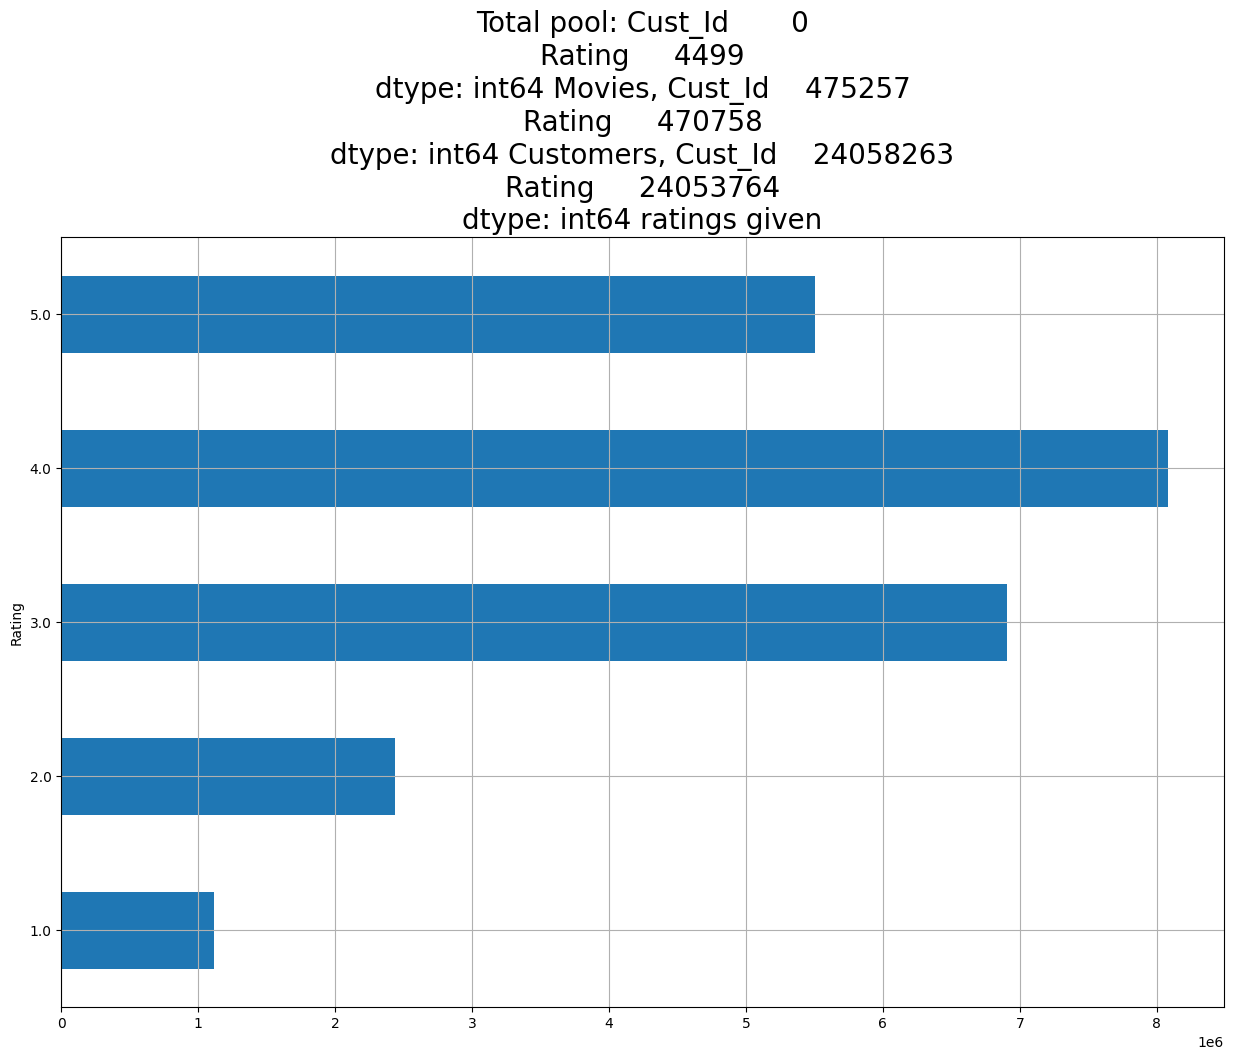

In [12]:
ax = p.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title(f'Total pool: {movie_count} Movies, {cust_count} Customers, {rating_count} ratings given', fontsize=20)
#plt.axis('off')
plt.grid(True)
#print--->print data  '' 'Total pool'

# To create a numpy array containing movie ids corresponding to the rows in the 'ratings' dataset

In [13]:
# To count all the 'nan' values in the Ratings column in the 'ratings' dataset
df_nan = pd.DataFrame(pd.isnull(dataset.Rating))

df_nan

,Rating
0,True
1,False
2,False
3,False
4,False
...,...
24058258,False
24058259,False
24058260,False
24058261,False


In [14]:
# To store the index of all the rows containing 'nan' values
df_nan = df_nan[df_nan['Rating'] == True]
df_nan

,Rating
0,True
548,True
694,True
2707,True
2850,True
...,...
24046714,True
24047329,True
24056849,True
24057564,True


In [15]:
# To reset the index of the dataframe
df_nan = df_nan.reset_index()
df_nan.head()

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True


In [16]:
#To create a numpy array containing movie ids according the 'ratings' dataset

movie_np = []
movie_id = 1
#into tuple
for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
    # numpy approach
    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1

In [17]:
# x =zip(df_nan['index'][1:],df_nan['index'][:-1])
# tuple(x)

In [18]:
# Account for last record and corresponding length
# numpy approach
last_record = np.full((1,len(dataset) - df_nan.iloc[-1, 0] - 1),movie_id)
movie_np = np.append(movie_np, last_record)

print(f'Movie numpy: {movie_np}')
print(f'Length: {len(movie_np)}')

Movie numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Length: 24053764


In [19]:
#temp = np.full((1,547), 1)

In [20]:
#print(temp)

In [21]:
#To append the above created array to the datset after removing the 'nan' rows
dataset = dataset[pd.notnull(dataset['Rating'])]#movies count so nan
dataset['Movie_Id'] = movie_np.astype(int)
dataset['Cust_Id'] =dataset['Cust_Id'].astype(int)
print('-Dataset examples-')
dataset.head()

-Dataset examples-


,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [22]:
dataset.shape

(24053764, 3)

# Data Cleaning

In [23]:
f = ['count','mean']
#count and mean

In [24]:
#To create a list of all the movies rated less often(only include top 30% rated movies)
dataset_movie_summary = dataset.groupby('Movie_Id').agg(f)
dataset_movie_summary

Cust_Id               Rating          
           count          mean  count      mean
Movie_Id                                       
1            547  1.249876e+06    547  3.749543
2            145  1.341926e+06    145  3.558621
3           2012  1.324290e+06   2012  3.641153
4            142  1.402854e+06    142  2.739437
5           1140  1.302384e+06   1140  3.919298
...          ...           ...    ...       ...
4495         614  1.321093e+06    614  3.478827
4496        9519  1.332006e+06   9519  3.763000
4497         714  1.330543e+06    714  2.715686
4498         269  1.262035e+06    269  2.464684
4499         428  1.270551e+06    428  2.614486

[4499 rows x 4 columns]

In [25]:
dataset_movie_summary = dataset.groupby('Movie_Id')['Rating'].agg(f) #Cous_ID mean does not matter

dataset_movie_summary.index = dataset_movie_summary.index.map(int) #Store all the movie_id indexes in a variable dataset_movie_summary.index
                                                                    #and convert the datatype to int

movie_benchmark = round(dataset_movie_summary['count'].quantile(0.7),0) #Atleast a benchmark of people has watched that movie

drop_movie_list = dataset_movie_summary[dataset_movie_summary['count'] < movie_benchmark].index

print('Movie minimum times of review: {}'.format(movie_benchmark))

Movie minimum times of review: 1799.0


In [26]:
dataset_movie_summary['count'].quantile(0.7)

1798.6

In [27]:
drop_movie_list

Int64Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
            ...
            4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
           dtype='int64', name='Movie_Id', length=3149)

In [28]:
dataset_cust_summary = dataset.groupby('Cust_Id')['Rating'].agg(f)
dataset_cust_summary

,count,mean
Cust_Id,,
6,153,3.333333
7,195,4.066667
8,21,4.000000
10,49,3.346939
25,4,3.500000
...,...,...
2649404,12,4.083333
2649409,10,4.000000
2649421,3,5.000000


In [29]:
#To create a list of all the inactive users(users who rate less often)
dataset_cust_summary = dataset.groupby('Cust_Id')['Rating'].agg(f) #mean and count of customer id
dataset_cust_summary.index = dataset_cust_summary.index.map(int) #integer format
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.7),0)
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count'] < cust_benchmark].index
#                                           6                       <  5
#drop_cust_list[3,4]
print(f'Customer minimum times of review: {cust_benchmark}')

Customer minimum times of review: 52.0


In [30]:
print(f'Original Shape: {dataset.shape}')


Original Shape: (24053764, 3)


In [31]:
dataset = dataset[~dataset['Movie_Id'].isin(drop_movie_list)]
#in dataset --->in all movie ids------>if the whic ever  movies we put under drop list are present or not---
#if present drop /remove them
dataset = dataset[~dataset['Cust_Id'].isin(drop_cust_list)]
#removing all inactive users from our dataset
print('After Dropping Shape: {}'.format(dataset.shape))

After Dropping Shape: (17337458, 3)


In [32]:
print('-Data Examples-')
dataset.head()

-Data Examples-


,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


# Create ratings matrix for 'ratings' matrix with Rows = userId, Columns = movieId

In [33]:
df_p = pd.pivot_table(dataset,values='Rating',index='Cust_Id',columns='Movie_Id')

print(df_p.shape)

(143458, 1350)


In [34]:
df_p.head()

Movie_Id,3,8,16,17,18,26,28,30,32,33,...,4472,4474,4478,4479,4485,4488,4490,4492,4493,4496
Cust_Id,,,,,,,,,,,,,,,,,,,,,
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,5.0,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,...,3.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### To load the movie_titles dataset

In [44]:
df_title = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Intellipaat/Weekend_ML_Batch/Netflix Project/movie_titles.csv", encoding = "ISO-8859-1", header = None, usecols = [0,1,2], names = ['Movie_Id', 'Year', 'Name'])

df_title.set_index('Movie_Id', inplace = True)

print (df_title.head(10))

            Year                          Name
Movie_Id                                      
1         2003.0               Dinosaur Planet
2         2004.0    Isle of Man TT 2004 Review
3         1997.0                     Character
4         1994.0  Paula Abdul's Get Up & Dance
5         2004.0      The Rise and Fall of ECW
6         1997.0                          Sick
7         1992.0                         8 Man
8         2004.0    What the #$*! Do We Know!?
9         1991.0      Class of Nuke 'Em High 2
10        2001.0                       Fighter


# To install the scikit-surprise library for implementing SVD

### Run the following command in the Anaconda Prompt to install surprise package

In [36]:
pip install scikit-surprise

In [37]:
# Import required libraries
import math
import seaborn as sns
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [38]:
# Load Reader library
reader = Reader() #help us to read the dataset for svd algo

# get just top 100K rows for faster run time
data = Dataset.load_from_df(dataset[['Cust_Id', 'Movie_Id', 'Rating']][:100000], reader)

# Use the SVD algorithm.
svd = SVD()

# Compute the RMSE of the SVD algorithm
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9959  0.9937  0.9994  0.9963  0.0023  
MAE (testset)     0.7948  0.7945  0.8047  0.7980  0.0048  
Fit time          2.99    2.38    3.33    2.90    0.39    
Test time         0.34    0.38    0.65    0.46    0.14    


{'test_rmse': array([0.99588203, 0.99370213, 0.99938237]),
 'test_mae': array([0.79480671, 0.79445477, 0.80474676]),
 'fit_time': (2.9948432445526123, 2.3820693492889404, 3.3311445713043213),
 'test_time': (0.3430309295654297, 0.37940049171447754, 0.6535093784332275)}

In [39]:
dataset.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


## To find all the movies rated as 5 stars by user with userId = 712664

In [40]:
#First we take a user '712664' and we try to recommend some movies based on the past data
#He rated so many movies with 5*
dataset_712664 = dataset[(dataset['Cust_Id'] == 712664) & (dataset['Rating'] == 5)]
# dataset_712664 = dataset_712664.set_index('Movie_Id')
# dataset_712664 = dataset_712664.join(df_title)['Name']
dataset_712664

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
308787,712664,5.0,79
577555,712664,5.0,175
898451,712664,5.0,199
1019562,712664,5.0,241
...,...,...,...
20461546,712664,5.0,3887
21752209,712664,5.0,4109
22487781,712664,5.0,4266
23397883,712664,5.0,4384


In [41]:
df_title

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


# Train an SVD to predict ratings for user with userId = 712664


In [42]:
# Create a shallow copy for the movies dataset so that we can change
user_712664 = df_title.copy()

user_712664 = user_712664.reset_index()

#To remove all the movies rated less often(below benchmark)
user_712664 = user_712664[~user_712664['Movie_Id'].isin(drop_movie_list)]


# getting full dataset
data = Dataset.load_from_df(dataset[['Cust_Id', 'Movie_Id', 'Rating']], reader)

#create a training set for svd
trainset = data.build_full_trainset()
svd.fit(trainset)

#Predict the ratings for user_712664
user_712664['Estimate_Score'] = user_712664['Movie_Id'].apply(lambda x: svd.predict(712664, x).est)

#Drop extra columns from the user_712664 data frame
user_712664 = user_712664.drop('Movie_Id', axis = 1)

# Sort predicted ratings for user_712664 in descending order
user_712664 = user_712664.sort_values('Estimate_Score', ascending=False)

#Print top 10 recommendations
print(user_712664.head(10))

        Year                                            Name  Estimate_Score
4352  2002.0                  Curb Your Enthusiasm: Season 3        5.000000
3289  1974.0                                   The Godfather        5.000000
721   2003.0                              The Wire: Season 1        5.000000
871   1954.0                                   Seven Samurai        5.000000
174   1992.0                                  Reservoir Dogs        5.000000
241   1995.0  Neon Genesis Evangelion: The End of Evangelion        4.987431
2429  1979.0                      Alien: Collector's Edition        4.961091
995   1961.0                                         Yojimbo        4.945463
1691  1989.0                                   Lonesome Dove        4.890613
2455  1964.0                            A Fistful of Dollars        4.890049


In [43]:
#Print top 5 Worst recommendations
print(user_712664.tail(5))

        Year                                   Name  Estimate_Score
3417  1993.0        Sister Act 2: Back in the Habit        1.154767
1292  1996.0  Children of the Corn 4: The Gathering        1.082766
1601  2000.0                     Dungeons & Dragons        1.063743
2275  1998.0                            Spice World        1.000000
361   2000.0     The Flintstones in Viva Rock Vegas        1.000000
